<a href="https://colab.research.google.com/github/oweixx/test/blob/main/2%EA%B0%95_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
%matplotlib inline
%config Inlineackend.figure_format='retina'
print(f'PyTorch Version: {torch.__version__}')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Device : {device}")

PyTorch Version: 2.3.1+cu121
Device : cuda


## DataSet

In [ ]:
from torchvision import datasets, transforms
mnist_train = datasets.MNIST(root='./data/', train = True, transform = transforms.ToTensor(), download = True)
mnist_test = datasets.MNIST(root='./data/', train = False, transform = transforms.ToTensor(), download = True)
print(f"mnist_train: {mnist_train}")
print(f"mnist_test: {mnist_test}")

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 15665915.79it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 483898.22it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4385651.29it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3207159.73it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

mnist_train: Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data/
    Split: Train
    StandardTransform
Transform: ToTensor()
mnist_test: Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data/
    Split: Test
    StandardTransform
Transform: ToTensor()


## Data Iterator

In [ ]:
BATCH_SIZE = 256
train_iter = torch.utils.data.DataLoader(mnist_train, batch_size = BATCH_SIZE, shuffle=True, num_workers = 1)
test_iter = torch.utils.data.DataLoader(mnist_test, batch_size = BATCH_SIZE, shuffle=True, num_workers = 1)
print('Done')

Done


## Define the MLP Model

In [ ]:
class MultiLayerPerceptronClass(nn.Module) :
  """
     Multilayer Perceptron (MLP) Class
  """
  def __init__(self, name = 'mlp', xdim = 784, hdim = 256, ydim = 10) :
    super(MultiLayerPerceptronClass, self).__init__()
    self.name = name
    self.xdim = xdim
    self.hdim = hdim
    self.ydim = ydim
    self.lin_1 = nn.Linear(self.xdim, self.hdim)
    self.lin_2 = nn.Linear(self.hdim, self.ydim)

    self.init_param()

  def init_param(self) :
    nn.init.kaiming_normal_(self.lin_1.weight)
    nn.init.zeros_(self.lin_1.bias)
    nn.init.kaiming_normal_(self.lin_2.weight)
    nn.init.zeros_(self.lin_2.bias)

  def forward(self, x) :
    net = x
    net = self.lin_1(net)
    net = F.relu(net)
    net = self.lin_2(net)
    return net

In [ ]:
M = MultiLayerPerceptronClass().to(device)
loss = nn.CrossEntropyLoss()
optimizer = optim.Adam(M.parameters(), lr = 0.001)
print(M)
print(loss)
print(optimizer)

MultiLayerPerceptronClass(
  (lin_1): Linear(in_features=784, out_features=256, bias=True)
  (lin_2): Linear(in_features=256, out_features=10, bias=True)
)
CrossEntropyLoss()
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)


## Simple Forward Path of the MLP Model

In [ ]:
x_numpy = np.random.rand(2, 784)
x_torch  = torch.from_numpy(x_numpy).float().to(device)
y_torch = M.forward(x_torch) # forward path
y_numpy = y_torch.detach().cpu().numpy() # torch tensor to numpy array

print(f'x_numpy: {x_numpy}')
print(f'x_torch: {x_torch}')
print(f'y_torch: {y_torch}')
print(f'y_numpy: {y_numpy}')

x_numpy: [[0.98884798 0.01729046 0.74670391 ... 0.17059995 0.91382288 0.60273903]
 [0.75921096 0.93422065 0.25061606 ... 0.81912969 0.10385392 0.574095  ]]
x_torch: tensor([[0.9888, 0.0173, 0.7467,  ..., 0.1706, 0.9138, 0.6027],
        [0.7592, 0.9342, 0.2506,  ..., 0.8191, 0.1039, 0.5741]],
       device='cuda:0')
y_torch: tensor([[ 0.2814, -0.4823,  0.7551, -0.1601,  0.3369,  0.9661,  2.3672,  2.0343,
          0.9786,  0.2947],
        [ 0.5904, -0.6138,  1.1055,  0.2303, -0.4073,  1.4551,  1.8417,  0.9815,
          0.5826,  0.4786]], device='cuda:0', grad_fn=<AddmmBackward0>)
y_numpy: [[ 0.28139102 -0.48228675  0.755122   -0.16014336  0.33691522  0.96613336
   2.3671784   2.034261    0.97860014  0.2947285 ]
 [ 0.5904148  -0.6138332   1.1054698   0.23025797 -0.40726236  1.4551336
   1.8417144   0.9814996   0.58258885  0.47859472]]


## Check Parameters

In [ ]:
np.set_printoptions(precision = 3)
n_param = 0
for p_idx, (param_name, param) in enumerate(M.named_parameters()) :
  param_numpy = param.detach().cpu().numpy()
  n_param += len(param_numpy.reshape(-1))
  print(f'[{p_idx}] name : [{param_name}] shape : [{param_numpy.shape}]')
  print(f'     val: {param_numpy.reshape(-1)[:5]}')

print(f'Total number of parameters: [{n_param}]')

[0] name : [lin_1.weight] shape : [(256, 784)]
     val: [ 0.025  0.027  0.026 -0.004  0.035]
[1] name : [lin_1.bias] shape : [(256,)]
     val: [0. 0. 0. 0. 0.]
[2] name : [lin_2.weight] shape : [(10, 256)]
     val: [-0.189  0.08   0.149 -0.036  0.002]
[3] name : [lin_2.bias] shape : [(10,)]
     val: [0. 0. 0. 0. 0.]
Total number of parameters: [203530]


## Evaluation Function

In [ ]:
def func_eval(model, data_iter, device) :
  with torch.no_grad() :
    model.eval()
    n_total, n_correct = 0, 0
    for batch_in, batch_out in data_iter :
      y_trgt = batch_out.to(device)
      model_pred = model(
          batch_in.view(batch_in.size(0), -1).to(device)
      )
      _, y_pred = torch.max(model_pred.data, 1)
      n_correct += (
          y_trgt == y_pred
      ).sum().item()
      n_total += batch_in.size(0)
    val_accr = (n_correct / n_total)* 100
    model.train() # back to train mode
  return val_accr

## Initial Evaluation

In [ ]:
M.init_param() # initialize parameters
train_accr = func_eval(M, train_iter, device)
test_accr = func_eval(M, test_iter, device)
print(f'train_accr: {train_accr}%')
print(f'test_accr: {test_accr}%')

train_accr: 11.450000000000001%
test_accr: 10.43%


## Train

In [ ]:
print('Start Training')
M.init_param() # initialize parameters()
M.train()
EPOCHS, print_every = 10, 1

for epoch in range(EPOCHS) :
  loss_val_sum = 0
  for batch_in, batch_out in train_iter :
    # Forward Path
    y_pred = M.forward(batch_in.view(-1, 28*28).to(device))
    loss_out = loss(y_pred, batch_out.to(device))

    # Update
    optimizer.zero_grad()
    loss_out.backward()
    optimizer.step()
    loss_val_sum += loss_out
  loss_val_avg = loss_val_sum / len(train_iter)
  if ((epoch % print_every) == 0) or (epoch == (EPOCHS - 1)) :
    train_accr = func_eval(M, train_iter, device)
    test_accr = func_eval(M, test_iter, device)
    print(f'Epoch: {epoch + 1}    loss: {loss_val_avg : .3f}    train_accr: {train_accr : .3f}    test_accr: {test_accr : .3f}')


Start Training
Epoch: 1    loss:  0.308    train_accr:  95.262    test_accr:  95.040
Epoch: 2    loss:  0.138    train_accr:  97.088    test_accr:  96.570
Epoch: 3    loss:  0.099    train_accr:  97.827    test_accr:  97.000
Epoch: 4    loss:  0.076    train_accr:  98.242    test_accr:  97.350
Epoch: 5    loss:  0.061    train_accr:  98.628    test_accr:  97.430
Epoch: 6    loss:  0.049    train_accr:  99.000    test_accr:  97.920
Epoch: 7    loss:  0.041    train_accr:  99.238    test_accr:  97.980
Epoch: 8    loss:  0.034    train_accr:  99.470    test_accr:  98.010
Epoch: 9    loss:  0.028    train_accr:  99.567    test_accr:  98.000
Epoch: 10    loss:  0.023    train_accr:  99.688    test_accr:  98.090


## Test

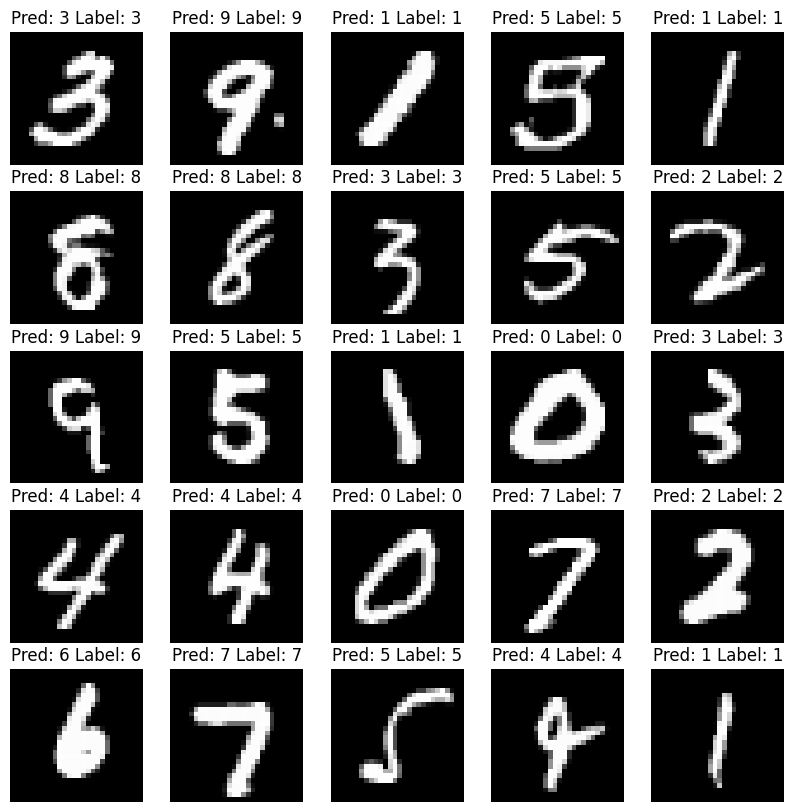

In [ ]:
n_sample = 25
sample_indices = np.random.choice(len(mnist_test.targets), n_sample, replace = False)
test_x = mnist_test.data[sample_indices]
test_y = mnist_test.targets[sample_indices]

with torch.no_grad() :
  y_pred = M.forward(test_x.view(-1, 28*28).type(torch.float).to(device) / 255.)
y_pred = y_pred.argmax(axis = 1)
plt.figure(figsize = (10, 10))

for idx in range(n_sample) :
  plt.subplot(5, 5, idx + 1)
  plt.imshow(test_x[idx], cmap = 'gray')
  plt.axis('off')
  plt.title(f'Pred: {y_pred[idx]} Label: {test_y[idx]}')
plt.show()